#  Principal component analysis（主成分分析）

PCA是在数据集中找到“主成分”或最大方差方向的线性变换。 它可以用于降维。 在本练习中，首先负责实现PCA并将其应用于一个简单的二维数据集，以了解它是如何工作的。 我们从加载和可视化数据集开始。

### 2.1 数据集

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio

In [43]:
data = sio.loadmat('D:\\机器学习\\聚类算法\\PCA主成分分析\\ex7data1.mat')

(50, 2)


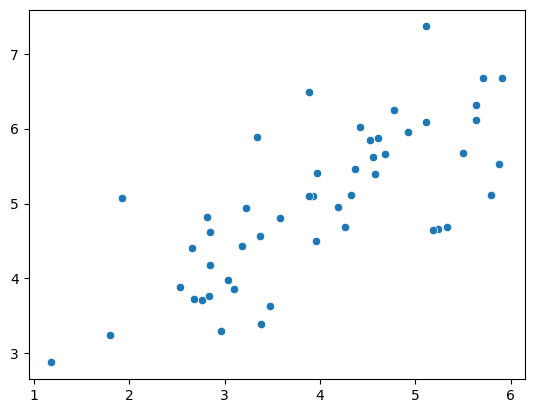

In [44]:
X = data['X']
print(X.shape)
sns.scatterplot(x = X[:,0] , y = X[:,1])
plt.show()

### 2.2 实现PCA

PCA的算法相当简单。 在确保数据被归一化之后，输出仅仅是原始数据的协方差矩阵的奇异值分解。

In [45]:
def pca(X):
    # 归一化数据 
    X = (X - X.mean(axis = 0)) / X.std(axis = 0)
    
    # 计算协方差矩阵 
    print(X.shape)
    cov = (X.T @ X) / X.shape[0]
    
    # 执行 奇异值分解
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

In [46]:
U, S, V = pca(X)
U, S, V

(50, 2)


(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([1.73553038, 0.26446962]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

1. 方差 (Variance)：
   - 我们单看“身高”。有的同学很高，有的很矮，大家差别很大。这个“差别的大小”，就叫方差。
   - 如果大家都一样高，方差就是 0（一潭死水）。
2. 协方差 (Covariance)： 
      $$Cov(x, y) = \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - \bar{x})(y^{(i)} - \bar{y})$$如果数据已经去过均值（$\bar{x}=0, \bar{y}=0$），公式就简化成了：$$Cov(x, y) = \frac{1}{m} \sum_{i=1}^{m} x^{(i)} y^{(i)}$$
   - 现在我们要看“身高”和“体重”这两个家伙的关系了。
   - 正相关 (好基友)：通常身高越高的人，体重也越重。它俩一起变大。这时协方差是正数。
   - 负相关 (死对头)：假设有个特征是“跑步速度”和“体重”。通常体重越重，跑得越慢。一个变大，另一个变小。这时协方差是负数。
   - 不相关 (路人)：比如“身高”和“考试成绩”。这俩完全没关系。这时协方差接近 0。
3. 这就是“协方差矩阵”： 它就是一个表格，把所有特征两两抓对厮杀，记录它们的关系。
   - 对角线上是方差（自己和自己的关系）。
   - 非对角线上是协方差（自己和其他人的关系）。
   - 一句话总结：协方差矩阵告诉我们要处理的那团“橡皮泥”是圆的（没关系），还是扁长的（有关系，斜着长）。

1. 第二部分：SVD (奇异值分解) —— “全自动切片机”
  - 有了“关系调查表”（协方差矩阵），我们知道橡皮泥大概是扁长的。现在，SVD (Singular Value Decomposition) 登场了。它的作用是帮你找到观察这团橡皮泥的最佳视角。
  - 想象这团数据橡皮泥被捏成了一个**橄榄球（或者法棍面包）**的形状，斜着漂浮在空中。SVD 会帮你把这个橄榄球“拆解”成三个部分：$U, S, V$ 
    - $U$ (特征向量/旋转矩阵) —— “指南针”
      - SVD 会在橄榄球上插几根棍子（坐标轴）：第一根棍子 ($U_1$)：插在橄榄球最长的那个方向。这是数据差异最大的方向（主成分1）。
      - 第二根棍子 ($U_2$)：插在和第一根垂直、且第二长的方向（主成分2）。$U$ 告诉我们在哪个方向上数据最有特点。
    - 2. $S$ (奇异值) —— “能量条”SVD 还会告诉你每根棍子有多长。
      - $S_1$ (第一个奇异值)：非常大！说明橄榄球在第一根棍子的方向上拉得很长（信息量最大）。
      - $S_2$ (第二个奇异值)：比较小。说明在这个方向上比较扁。
      - $S_3$ ...：如果是 0，说明那个方向完全是扁平的，没有任何厚度。
2. 为什么我们要用 $S$？做降维（PCA）的时候，我们就像是“势利眼”：只保留 $S$ 值大的那些方向，把 $S$ 值很小的方向直接丢掉（认为那是噪音或者不重要）。

### 2.3 用PCA降低维度

现在我们有主成分（矩阵U），我们可以用这些来将原始数据投影到一个较低维的空间中。 对于这个任务，我们将实现一个计算投影并且仅选择顶部K个分量的函数，有效地减少了维数。

#### 2.3.1 把数据映射到主成分上

In [47]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return X @ U_reduced

In [48]:
Z = project_data(X, U, 1)

#### 2.3.2 恢复数据
我们也可以通过反向转换步骤来恢复原始数据。

In [49]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return Z @ U_reduced.T

In [50]:
X_recovered = recover_data(Z, U, 1)

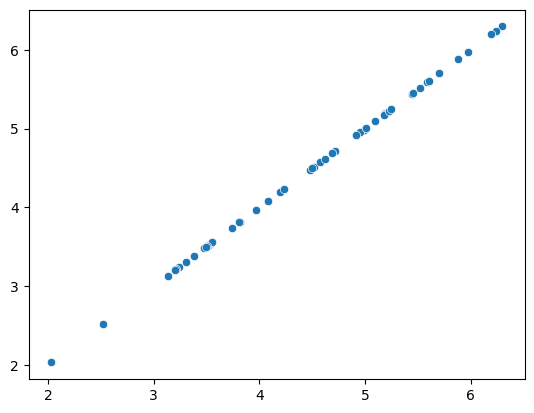

In [51]:

sns.scatterplot( x = X_recovered[:, 0],  y = X_recovered[:, 1] )
plt.show()

PCA 数学原理深度推导
如果原式是 $ m * n $ , 那么 u 是 $ m * m $ , s 是 $ m * n $ ， v是 $ n * n $ 
1. 核心前提：标准正交基的性质在 PCA 算法中，通过奇异值分解（SVD）得到的矩阵 $U$ 是一个正交矩阵。它具有以下三个对推导至关重要的数学特性：单位正交性：$U$ 的每一列 $u_i$ 都是相互垂直且长度为 1 的单位向量。转置即逆：对于正交阵，$U^T = U^{-1}$。这意味着 $U^T U = I$（单位阵）。子空间性质：当我们截取前 $k$ 列得到 $U_{red} = [u_1, u_2, \dots, u_k]$ 时，虽然它不再是方阵，但依然满足 $U_{red}^T U_{red} = I_{k \times k}$。2. 投影（降维）推导：$Z = X \cdot U_{red}$假设原始数据点是一个向量 $x \in \mathbb{R}^n$。降维的本质是将该向量投影到由 $U_{red}$ 的列向量所张成的 $k$ 维子空间中。标量投影：向量 $x$ 在单位方向 $u_j$ 上的投影坐标（标量）为：$$z_j = x \cdot u_j = x^T u_j$$矩阵化表达：如果我们同时考虑前 $k$ 个主成分方向，并将 $x$ 作为行向量（符合代码中的数据存储方式）：$$z = [z_1, z_2, \dots, z_k] = [x \cdot u_1, x \cdot u_2, \dots, x \cdot u_k]$$利用矩阵乘法法则，这可以写成：$$z = x \cdot U_{red}$$数据集应用：对于包含 $m$ 个样本的矩阵 $X_{m \times n}$，整体投影后的坐标矩阵为：$$Z_{m \times k} = X_{m \times n} \cdot U_{red(n \times k)}$$3. 恢复（重构）推导：$\hat{X} = Z \cdot U_{red}^T$当我们得到低维坐标 $z$ 后，如何将其映射回原始的 $n$ 维空间？线性组合视角：恢复出的向量 $\hat{x}$ 实际上是以 $z_j$ 为权重，对 $k$ 个主成分向量进行加权求和：$$\hat{x} = \sum_{j=1}^k z_j u_j$$矩阵化重构：根据矩阵乘法的列组合定义，上述公式等价于：$$\hat{x} = z \cdot [u_1, u_2, \dots, u_k]^T = z \cdot U_{red}^T$$整体数据集恢复：$$\hat{X}_{m \times n} = Z_{m \times k} \cdot U_{red(k \times n)}^T$$4. 深度解析：为什么重构误差最小？在您学习机器学习的过程中，理解“为什么要取最大的奇异值”至关重要：重构误差定义：$J = \|x - \hat{x}\|^2$。能量守恒（勾股定理）：由于 $U$ 是标准正交基，总方差（能量）可以分解为：$$\|x\|^2 = \sum_{j=1}^n (x^T u_j)^2$$结论：恢复后的能量为 $\sum_{j=1}^k (x^T u_j)^2$。要使误差 $J$ 最小，等价于让保留的能量最大。因此，我们必须选择对应奇异值（方差）最大的前 $k$ 个方向。

请注意，第一主成分的投影轴基本上是数据集中的对角线。 当我们将数据减少到一个维度时，我们失去了该对角线周围的变化，所以在我们的再现中，一切都沿着该对角线。

### 2.4 人脸图像数据集

我们在此练习中的最后一个任务是将PCA应用于脸部图像。 通过使用相同的降维技术，我们可以使用比原始图像少得多的数据来捕获图像的“本质”。

In [52]:
faces = sio.loadmat('D:\\机器学习\\聚类算法\\PCA主成分分析\\ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

In [53]:
def plot_n_image(X):
        sample_idx = np.random.choice(np.arange(0,5000,1),100)
     #   print(sample_idx)
        sample_data = X[sample_idx,:]
        fig,ax = plt.subplots(10,10,figsize = (8,8))
        for r in range(10):
                for c in range(10):
                        ax[r,c].imshow(sample_data[10*r+c].reshape(32,32).T)
        #这两行代码意图是移除坐标轴上的刻度数字，让图像看起来更干净。
                        ax[r,c].set_xticks([])
                        ax[r,c].set_yticks([])
        plt.show()

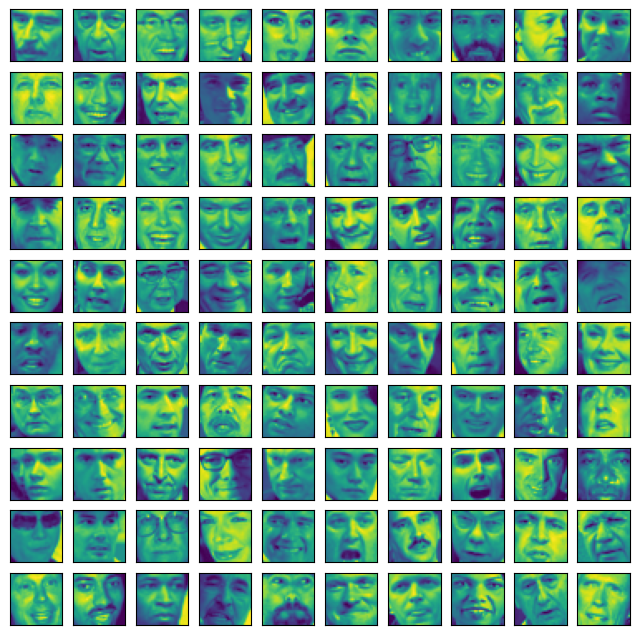

In [54]:
plot_n_image(X)

In [55]:
face = np.reshape(X[3,:], (32, 32)).T

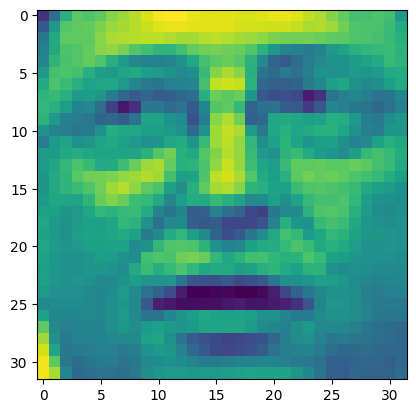

In [56]:
plt.imshow(face)
plt.show()

看起来很糟糕。 这些只有32 x 32灰度的图像（它也是侧面渲染，但我们现在可以忽略）。 我们的下一步是在面数据集上运行PCA，并取得前100个主要特征。

In [57]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

(5000, 1024)


现在我们可以尝试恢复原来的结构并再次渲染。

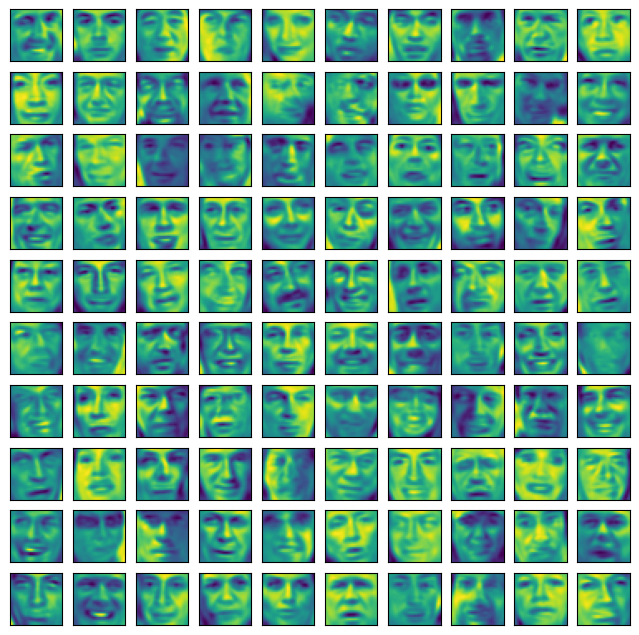

In [58]:
X_recovered = recover_data(Z, U, 100)

plot_n_image(X_recovered,)

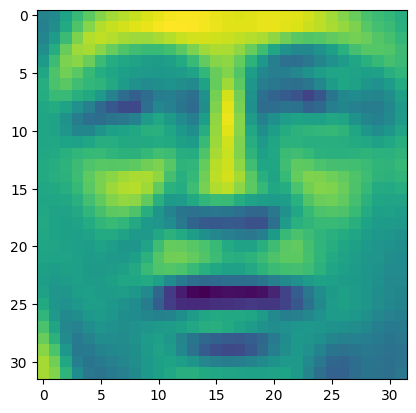

In [59]:
face = np.reshape(X_recovered[3,:], (32, 32)).T
plt.imshow(face)
plt.show()

请注意，我们失去了一些细节，尽管没有像您预期的维度数量减少10倍。


# 特征值分解与奇异值分解 (SVD) 的区别

在深入学习机器学习（如降维、推荐系统）时，理解**特征值/特征向量（Eigenvalues/Eigenvectors）**与**奇异值/奇异向量（Singular Values/Singular Vectors）**的区别至关重要。

简单来说，特征值分解是矩阵对“自身”的剖析，而奇异值分解（SVD）是对“变换”过程的分解。

---

## 1. 核心定义与数学表达

### 特征值分解 (Eigendecomposition)
只适用于**方阵** ($n \times n$)。对于方阵 $A$，如果存在非零向量 $\mathbf{v}$ 使得：
$$A\mathbf{v} = \lambda\mathbf{v}$$
则 $\lambda$ 是特征值，$\mathbf{v}$ 是对应的特征向量。
* **物理意义**：矩阵 $A$ 对向量 $\mathbf{v}$ 的作用仅仅是**伸缩**，而不改变其**方向**（或使其完全反向）。

### 奇异值分解 (SVD)
适用于**任意** $m \times n$ 矩阵。分解形式为：
$$A = U\Sigma V^T$$
其中：
* $V$ 的列向量称为**右奇异向量**（输入空间的基）。
* $U$ 的列向量称为**左奇异向量**（输出空间的基）。
* $\Sigma$ 是对角矩阵，对角线上的元素 $\sigma$ 称为**奇异值**。
* **物理意义**：它描述了如何将一个空间中的向量旋转、拉伸，最后映射到另一个空间中。

---

## 2. 关键区别对比

| 维度 | 特征值分解 (Eigendecomposition) | 奇异值分解 (SVD) |
| :--- | :--- | :--- |
| **适用范围** | 仅限于**方阵**。 | 适用于**任何形状**的矩阵（长方形也可）。 |
| **存在性** | 不一定存在（有些方阵不可对角化）。 | **始终存在**。 |
| **正交性** | 特征向量不一定正交（除非是对称矩阵）。 | 奇异向量 $U$ 和 $V$ 始终是**标准正交基**。 |
| **数值特征** | 特征值可以是**复数**或**负数**。 | 奇异值始终是**非负实数**。 |
| **空间映射** | 描述空间到**自身**的变换（基不变）。 | 描述从**一个空间到另一个空间**的变换（基改变）。 |

---

## 3. 几何直观

* **特征向量**：代表了变换中的“不变方向”。你可以想象一个物体在拉伸时，某些轴线上的方向保持不动，只改变长度。
* **奇异向量**：描述了变换的“主轴”。
    * 想象一个单位圆。
    * 经过矩阵 $A$ 变换后，它变成了一个**椭圆**。
    * **奇异值**就是这个椭圆半长轴和半短轴的**长度**。
    * **右奇异向量 $V$** 是变换前的初始轴向。
    * **左奇异向量 $U$** 是变换后椭圆轴向的方向。

---

## 4. 两者的内在联系

虽然它们在定义上不同，但在数学上存在紧密的转换关系：
1.  **奇异值是特征值的平方根**：矩阵 $A$ 的奇异值 $\sigma_i$ 是矩阵 $A^T A$（或 $AA^T$）特征值 $\lambda_i$ 的算术平方根：$$\sigma_i = \sqrt{\lambda_i(A^T A)}$$
2.  **奇异向量就是特征向量**：
    * $A$ 的**右奇异向量**（$V$ 的列）是 $A^T A$ 的特征向量。
    * $A$ 的**左奇异向量**（$U$ 的列）是 $AA^T$ 的特征向量。
3.  **特殊情况**：如果 $A$ 是一个**正定对称矩阵**，那么它的奇异值就等于它的特征值，奇异向量就等于特征向量。

---

## 5. 为什么 SVD 更常用？

在实际处理数据时，SVD 比特征值分解更受欢迎，原因包括：
* **普适性**：现实中的数据矩阵几乎都不是方阵，只能用 SVD。
* **数值稳定性**：计算 $A^T A$ 会导致数值精度的平方级损失，直接对 $A$ 进行 SVD 分解在计算上更稳定、更精确。
* **信息压缩**：奇异值的大小直接反映了该方向上的能量/重要性。保留最大的前 $k$ 个奇异值即可实现性能极佳的降维和去噪。